In [1]:
import pandas as pd

In [2]:
outlier_data = pd.read_csv("./Data_with_Outliers.csv")

outlier_data.head()

,nilai
0,52.483571
1,49.308678
2,53.238443
3,57.615149
4,48.829233


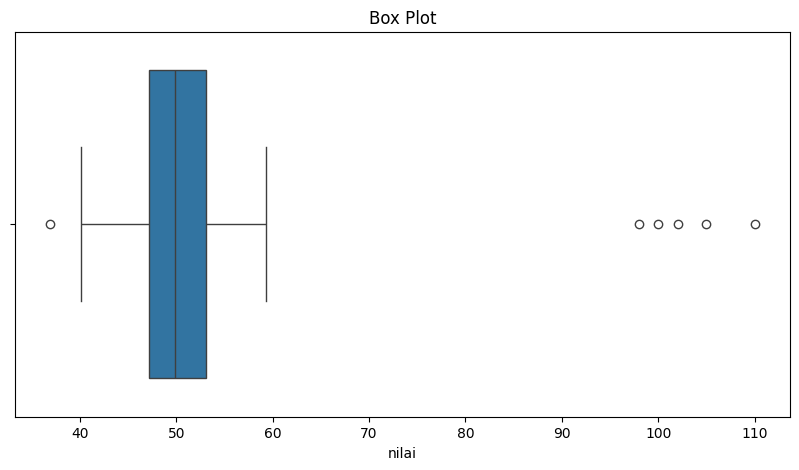

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=outlier_data['nilai'])
plt.title('Box Plot')
plt.show()

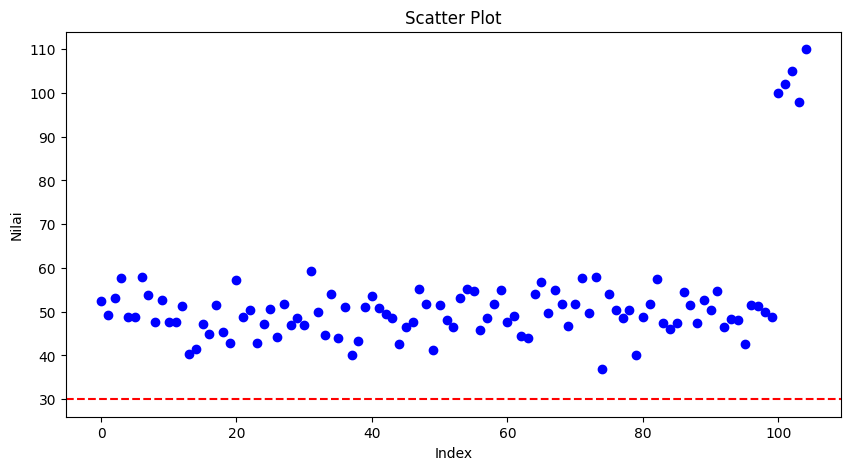

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(outlier_data)), outlier_data['nilai'], color='blue')
plt.axhline(y=30, color='red', linestyle='--')  # Batas atas
plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Nilai')
plt.show()

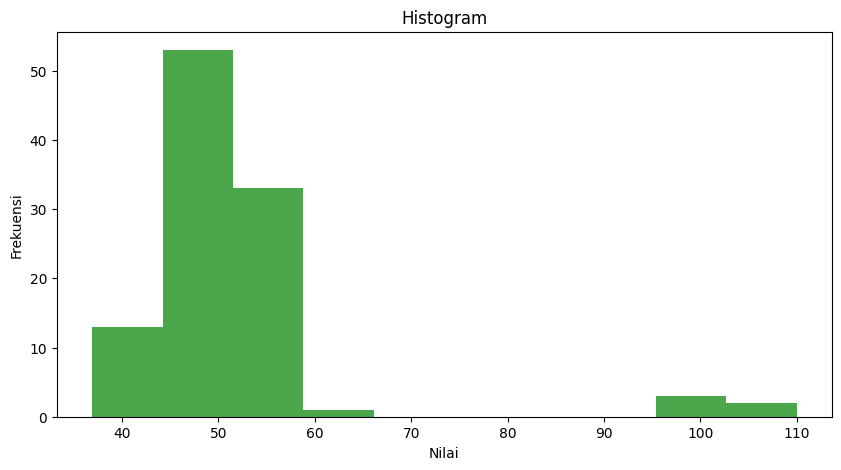

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(outlier_data['nilai'], bins=10, color='green', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_38816\2013422612.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlier_data['nilai'], shade=True, fill= True)


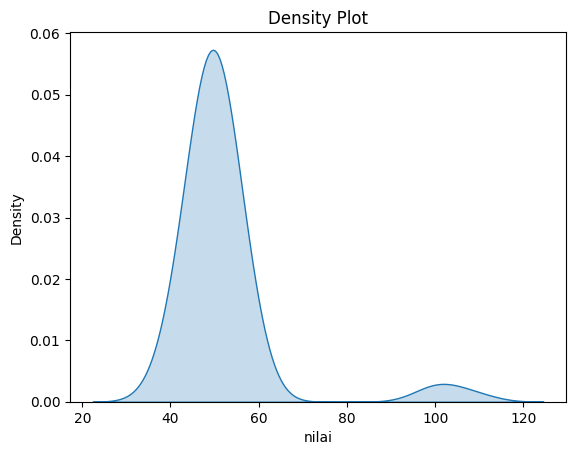

In [7]:
sns.kdeplot(outlier_data['nilai'], shade=True, fill=True)
plt.title('Density Plot')
plt.show()

In [8]:
from scipy import stats

outlier_data['z_score'] = stats.zscore(outlier_data['nilai'])
outliers_zscore = outlier_data[outlier_data['z_score'].abs() > 3]
print(outliers_zscore)

     nilai   z_score
100  100.0  3.914447
101  102.0  4.077649
102  105.0  4.322451
103   98.0  3.751245
104  110.0  4.730455


In [9]:
Q1 = outlier_data['nilai'].quantile(0.25)
Q3 = outlier_data['nilai'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = outlier_data[(outlier_data['nilai'] < lower_bound) | (outlier_data['nilai'] > upper_bound)]
print(outliers_iqr)

          nilai   z_score
74    36.901274 -1.234459
100  100.000000  3.914447
101  102.000000  4.077649
102  105.000000  4.322451
103   98.000000  3.751245
104  110.000000  4.730455


In [10]:
import numpy as np

def modified_z_score(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    return 0.6745 * (data - median) / mad

outlier_data['modified_z_score'] = modified_z_score(outlier_data['nilai'])
outliers_modified_z = outlier_data[outlier_data['modified_z_score'].abs() > 3.5]
print(outliers_modified_z)

     nilai   z_score  modified_z_score
100  100.0  3.914447         11.962179
101  102.0  4.077649         12.438958
102  105.0  4.322451         13.154127
103   98.0  3.751245         11.485400
104  110.0  4.730455         14.346074


In [14]:
from scipy.stats.mstats import winsorize

outlier_data_2 = outlier_data.copy()

outlier_data_2['nilai_winsorized'] = winsorize(outlier_data_2['nilai'], limits=[0.05, 0.05])

C:\Users\Asus\AppData\Local\Temp\ipykernel_38816\2696675828.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlier_data_2['nilai_winsorized'], shade=True, fill= True)


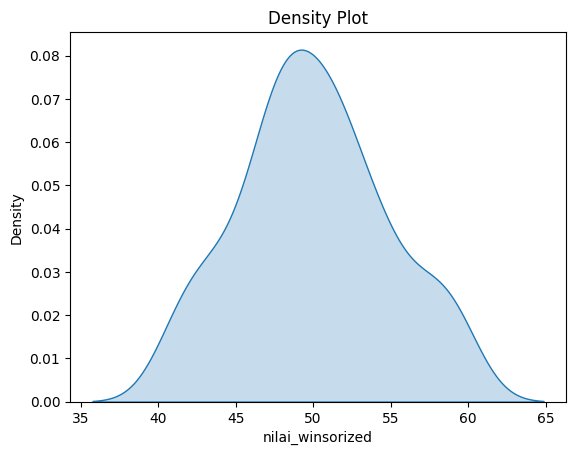

In [16]:
sns.kdeplot(outlier_data_2['nilai_winsorized'], shade=True, fill= True)
plt.title('Density Plot')
plt.show()

In [18]:
outlier_data_3 = outlier_data.copy()

median = outlier_data_3['nilai'].median()
outlier_data_3.loc[outlier_data_3['nilai'] > upper_bound, 'nilai'] = median
outlier_data_3.loc[outlier_data_3['nilai'] < lower_bound, 'nilai'] = median

C:\Users\Asus\AppData\Local\Temp\ipykernel_38816\2665373582.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlier_data_3['nilai'], shade=True, fill= True)


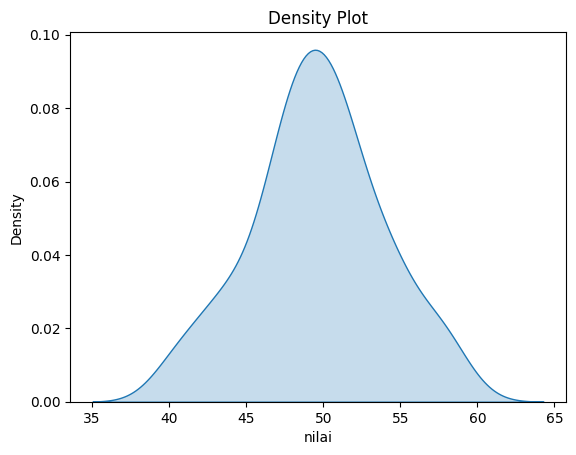

In [20]:
sns.kdeplot(outlier_data_3['nilai'], shade=True, fill= True)
plt.title('Density Plot')
plt.show()

In [22]:
outlier_data_4 = outlier_data.copy()

outlier_data_4['nilai_log'] = np.log1p(outlier_data_4['nilai'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_38816\2737174700.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlier_data_4['nilai_log'], shade=True, fill= True)


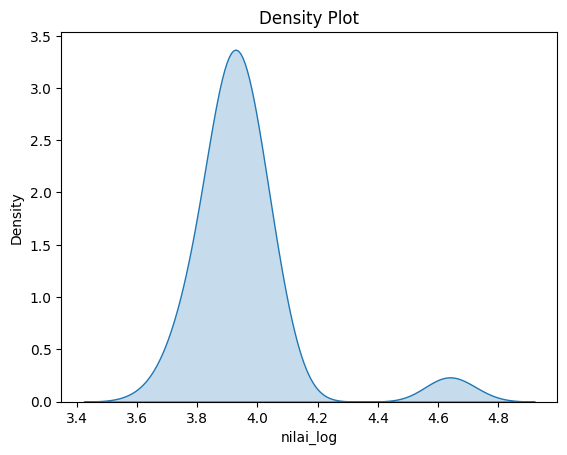

In [24]:
sns.kdeplot(outlier_data_4['nilai_log'], shade=True, fill= True)
plt.title('Density Plot')
plt.show()

In [25]:
outlier_data['nilai_reciprocal'] = 1 / outlier_data['nilai']

C:\Users\Asus\AppData\Local\Temp\ipykernel_38816\1515176823.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlier_data['nilai_reciprocal'], shade=True, fill= True)


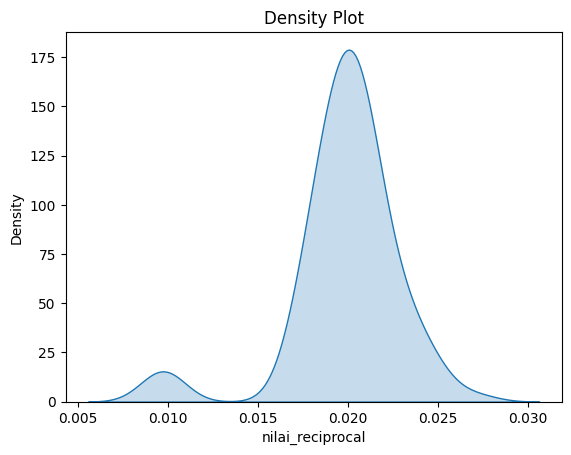

In [26]:
sns.kdeplot(outlier_data['nilai_reciprocal'], shade=True, fill= True)
plt.title('Density Plot')
plt.show()

In [27]:
outlier_data['nilai_clipped'] = np.clip(outlier_data['nilai'], lower_bound, upper_bound)

C:\Users\Asus\AppData\Local\Temp\ipykernel_38816\3675786771.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlier_data['nilai_clipped'], shade=True, fill= True)


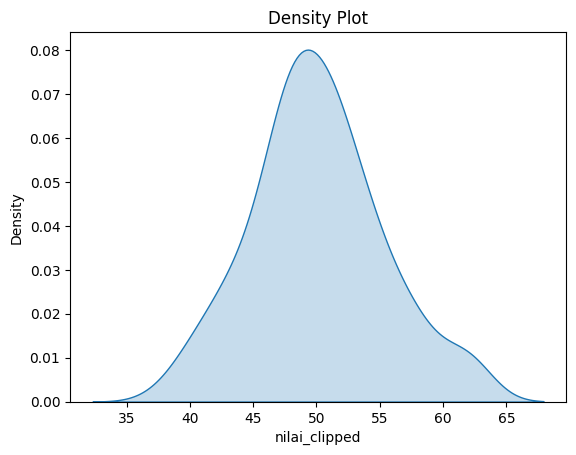

In [28]:
sns.kdeplot(outlier_data['nilai_clipped'], shade=True, fill= True)
plt.title('Density Plot')
plt.show()